# Лабораторная работа №1
### Конечномерная оптимизация, градиентные методы

## Постановка задачи

1) Запрогать GD модификацию, выбрать персонально 2 функции из книжки или scikit.

2) Их визуализировать, реализовать sgd, sgd+LR schedule. 

3) Запрогать 1 моментный метод и 1 адаптивный. 

ДОП БАЛЛ: запрогать анимацию того как метод шагает по точкам на ландшафте (гифку например).

Два варианта: выбрать 100-1000 случ точек из функции и исп в качестве датасета или сгенерировать блобы 

## Градиентный спуск (+ Learning Rate Schedule)

In [1]:
from typing import Tuple, Mapping

import numpy as np
import random
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import datasets
from matplotlib.animation import FuncAnimation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot

#GDF
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя простейшая реализация градиентного спуска.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(T):
        # так стабильнее
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)
    
#GDF+LRS
def my_GD_LRS(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01, 
              T: int = 100, lre: int = 7, g: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя простейшая реализация градиентного спуска + Learning Rate Schedule.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        # так стабильнее
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)
    

## Функция Химмельблау

$$ f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $$

In [2]:
#функция 1
def Himmelblau(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Химмельблау
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''
    return np.square(np.square(x)+y-11)+np.square(x+np.square(y)-7);

#градиент 1
def Himmelblau_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([(4*x*(np.square(x)+y-11)+2*(x+np.square(y)-7)), (2*(np.square(x)+y-11)+4*y*(x+np.square(y)-7))]);


print('f(3, 2) = 0')
print('f(-2.805118, 3.131312) = 0')
print('f(-3.779310, -3.283186) = 0')
print('f(3.584428, -1.848126) = 0')
print('Himmelblau Result 1: ', Himmelblau(3, 2))
print('Himmelblau Result 2: ', Himmelblau(-2.805118, 3.131312))
print('Himmelblau Result 3: ', Himmelblau(-3.779310, -3.283186))
print('Himmelblau Result 4: ', Himmelblau(3.584428, -1.848126))
print('Himmelblau Gradient Result 1: ', Himmelblau_Grad(3, 2))
print('Himmelblau Gradient Result 2: ', Himmelblau_Grad(-2.805118, 3.131312))
print('Himmelblau Gradient Result 3: ', Himmelblau_Grad(-3.779310, -3.283186))
print('Himmelblau Gradient Result 4: ', Himmelblau_Grad(3.584428, -1.848126))

f(3, 2) = 0
f(-2.805118, 3.131312) = 0
f(-3.779310, -3.283186) = 0
f(3.584428, -1.848126) = 0
Himmelblau Result 1:  0
Himmelblau Result 2:  1.0989296656869089e-11
Himmelblau Result 3:  3.797861082863832e-12
Himmelblau Result 4:  8.894376497582423e-12
Himmelblau Gradient Result 1:  [0 0]
Himmelblau Gradient Result 2:  [ 4.97133560e-06 -4.15751018e-05]
Himmelblau Gradient Result 3:  [ 2.97052500e-05 -7.92677776e-06]
Himmelblau Gradient Result 4:  [-3.20016529e-05  1.30893338e-05]


In [3]:
#набор точек
z, y = skl.datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=0)
y = np.zeros(10)
x = np.zeros(10)
# Нам нужно сравнить размерности массивов
#y=np.reshape(y,x.shape)
for i in range(len(z)):
    x[i],y[i] = z[i];
print('X: ', x)
print('Y: ', y)

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]


In [4]:
#тест GD 1
result = my_GD(Himmelblau, Himmelblau_Grad, x, y)
#gd_ind = np.argmin(result[2])
gd_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Himmelblau Result: ', result[2])

X:  [ 0.75346238 -0.5790789   1.92467514  2.91100253  3.28359619  1.69800277
  3.27175488  2.65855948  0.74396982  2.96750991]
Y:  [-0.44437998  2.05122042  2.19392178  1.44880393  0.72899789  1.96132508
  0.22712409  2.39885232  1.78907497  0.1585847 ]
Himmelblau Result:  [154.89322249  85.55898181  26.09604258   5.12044908  10.40513058
  40.00731707  13.52251871   4.34744616  84.28565955  20.20122867]


Text(0.5, 0, 'Z Label')

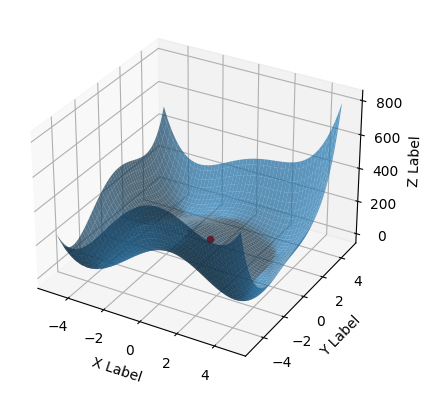

In [5]:
#тест графика обучения GD 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_GD(Himmelblau, Himmelblau_Grad, x, y)

ax.scatter(point[0][gd_ind], point[1][gd_ind], point[2][gd_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [6]:
#тест GD+LRS 1
result = my_GD_LRS(Himmelblau, Himmelblau_Grad, x, y)
#gds_ind = np.argmin(result[2])
gds_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Himmelblau Result: ', result[2])

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
Himmelblau Result:  [759.85203258 110.57900416 157.92436535  21.31987261  14.07315326
 217.76765763  21.83369908  47.91238225 289.66911884  50.0296433 ]


Text(0.5, 0, 'Z Label')

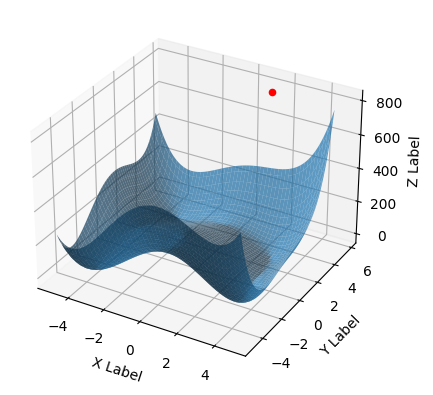

In [7]:
#тест графика обучения GD_LRS 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_GD_LRS(Himmelblau, Himmelblau_Grad, x, y)

ax.scatter(point[0][gds_ind], point[1][gds_ind], point[2][gds_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [8]:
'''from matplotlib.ticker import MaxNLocator
import matplotlib.animation as animation

# Изобразим функцию Химмельблау
grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

x_est = 0.3
y_est = 0.4
r = 0.001

x_list = []
y_list = []

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(X, Y, Z, 50)
Epochs = 300
for i in range(Epochs):
    ax.clear()
    ax.clabel(cs, fontsize=9, inline=1)

    cs = ax.contour(X, Y, Z, 50)



    z_est = Himmelblau(x_est, y_est)
    ax.scatter(x_est, y_est, c="r")
    x_list.append(x_est)
    y_list.append(y_est)
    ax.plot(x_list, y_list, c="r")
    ax.text(-0.75, 0.6, "Value : %.4f" % np.double(z_est))

    #print (Himmelblau_Grad(x_est, y_est)* r)
    
    x_est, y_est = x_est - Himmelblau_Grad(x_est, y_est)[0] * r, y_est - Himmelblau_Grad(x_est, y_est)[1] * r
    
    #plt.savefig("step{0}".format(i), bbox_inches='tight')
    
plt.show()'''

'from matplotlib.ticker import MaxNLocator\nimport matplotlib.animation as animation\n\n# Изобразим функцию Химмельблау\ngrid_points = 100\na = b = np.arange(-5.0, 5.0, 0.1)\nX, Y = np.meshgrid(a, b)\n# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)\nc = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))\nZ = c.reshape(X.shape)\n\nlevelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())\nlevels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())\n\nx_est = 0.3\ny_est = 0.4\nr = 0.001\n\nx_list = []\ny_list = []\n\n# Create figure\nfig, ax = plt.subplots(figsize=(9,5))\ncs = ax.contour(X, Y, Z, 50)\nEpochs = 300\nfor i in range(Epochs):\n    ax.clear()\n    ax.clabel(cs, fontsize=9, inline=1)\n\n    cs = ax.contour(X, Y, Z, 50)\n\n\n\n    z_est = Himmelblau(x_est, y_est)\n    ax.scatter(x_est, y_est, c="r")\n    x_list.append(x_est)\n    y_list.append(y_est)\n    ax.plot(x_list, y_list, c="r")\n    ax.text(-0.75, 0.6, "Va

In [9]:
from IPython.display import Image
Image(url='Himmelblau_LR_0.001.gif')  

## Функция Комрика

$$ f(x, y) = sin(x + y)+(x - y)^2 - 1.5x + 2.5y +1 $$

In [10]:
#функция 1
def McCormick(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Химмельблау
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''
    return np.sin(x + y)+np.square(x - y)-1.5*x+2.5*y+1;

#градиент 1
def McCormick_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([np.cos(x+y)+2*(x-y)-1.5, np.cos(x+y)-2*(x-y)+2.5]);

print('f(-0.54719, -1.54719) = -1.9133')
print('McCormick Result: ', McCormick(-0.54719, -1.54719))
print('McCormick Offset: ', 1.9133+McCormick(-0.54719, -1.54719))
print('McCormick Gradient Result: ', McCormick_Grad(-0.54719, -1.54719))

f(-0.54719, -1.54719) = -1.9133
McCormick Result:  -1.913222954882274
McCormick Offset:  7.704511772610445e-05
McCormick Gradient Result:  [1.30791132e-05 1.30791132e-05]


In [11]:
#тест GD 2
result = my_GD(McCormick, McCormick_Grad, x, y)
gd_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('McCormick Result: ', result[2])

X:  [ 1.21978817 -0.446687    1.97608809  2.49709055  3.51174342  1.79614331
  2.88939759  2.8585453   0.95720218  2.34429369]
Y:  [5.63202547 1.48035737 4.07311685 1.2400095  0.72917587 4.33677166
 0.19576071 3.28191943 4.60488339 0.07251708]
McCormick Result:  [33.25669611  9.94360669 12.38433835  1.37371181  4.40710499 15.45280123
  4.46738943  4.9539897  23.72177243  3.4887933 ]


Text(0.5, 0, 'Z Label')

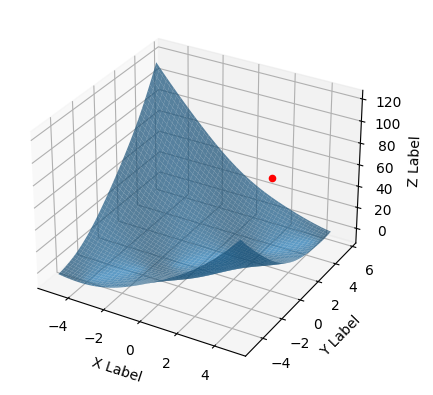

In [12]:
#тест графика обучения GD 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(McCormick(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_GD(McCormick, McCormick_Grad, x, y)

ax.scatter(point[0][gd_ind], point[1][gd_ind], point[2][gd_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [13]:
#тест GD+LRS 2
result = my_GD_LRS(McCormick, McCormick_Grad, x, y)
gds_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('McCormick Result: ', result[2])

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
McCormick Result:  [35.78404597 10.69239778 13.24395598  1.38152057  4.67746027 16.56374462
  4.71636228  5.1709044  25.59127931  3.62759821]


Text(0.5, 0, 'Z Label')

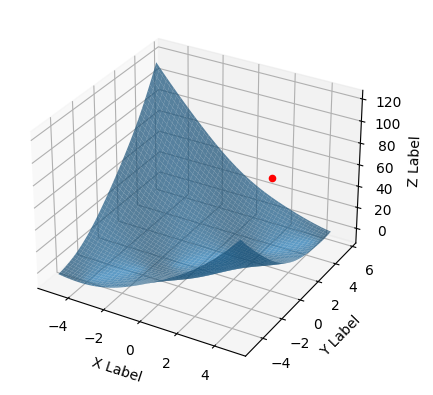

In [14]:
#тест графика обучения GD_LRS 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(McCormick(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_GD(McCormick, McCormick_Grad, x, y)

ax.scatter(point[0][gds_ind], point[1][gds_ind], point[2][gds_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## Моментный метод (+ Нестерова)

In [15]:
#Nesterov Accelerated Gradient
def my_NAG(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01, 
              T: int = 100, lre: int = 7, g: float = 0.1, m: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя реализация Оптимизатора Нестерова.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1.
        m (float): Коэфициент сохранения момента памяти для следующего шага. Default = 0.1.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    x_old = x0;
    y_old = y0;
    n = np.zeros(df(x,y).shape)
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        n = m*n - lr*df(x+m*n[0], y+m*n[1])
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [16]:
# NAG 1
result = my_NAG(Himmelblau,Himmelblau_Grad,x,y,lr=0.1,lre=20)
nag_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Himmelblau Nesterov Result: ', result[2])

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806084 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
Himmelblau Nesterov Result:  [759.85203301 110.57900417 157.92436539  21.31987262  14.07315326
 217.7676577   21.83369908  47.91238226 289.66911893  50.0296433 ]


Text(0.5, 0, 'Z Label')

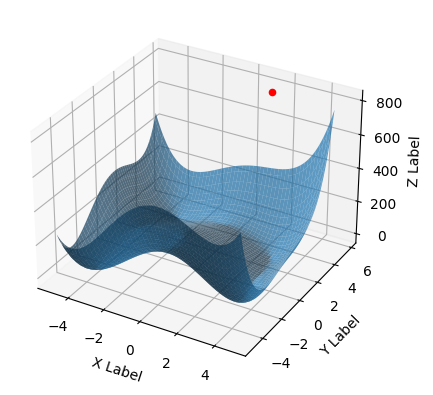

In [17]:
#тест графика обучения NAG 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_NAG(Himmelblau,Himmelblau_Grad,x,y,lr=0.1,lre=20)

ax.scatter(point[0][nag_ind], point[1][nag_ind], point[2][nag_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [18]:
# NAG 2
result = my_NAG(McCormick,McCormick_Grad,x,y,lr=0.1,lre=20)
nag_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('McCormick Nesterov Result: ', result[2])

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
McCormick Nesterov Result:  [35.78404597 10.69239778 13.24395598  1.38152057  4.67746027 16.56374462
  4.71636228  5.1709044  25.59127931  3.62759821]


Text(0.5, 0, 'Z Label')

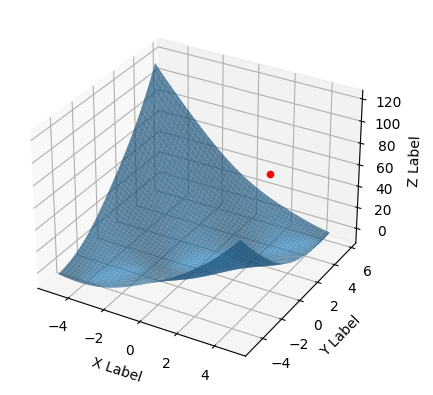

In [19]:
#тест графика обучения NAG 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(McCormick(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_NAG(McCormick,McCormick_Grad,x,y,lr=0.1,lre=20)

ax.scatter(point[0][nag_ind], point[1][nag_ind], point[2][nag_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## Адаптивный метод (ADAM)

In [20]:
#Adaptive - ADAM
def my_Adam(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100, lre: int = 7, g: float = 0.1, mom: float = 0.9, mom_flat: float = 0.9) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule + Adam.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1
        mom (float): Коэфициент сохранения момента Default = 0.9
        mom_flat (float): Коэфициент сохранения момента сглаживания Default = 0.9
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    m=np.zeros(df(x0, y0).shape)
    # Средний квадрат градиента
    Grad_SQRT=np.zeros((df(x0, y0)**2).shape)
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        m=mom*m-lr*(1-mom)*df(x0, y0)
        Grad_SQRT=mom_flat*Grad_SQRT+(1-mom_flat)*df(x0, y0)**2
        n=(lr*df(x0, y0)*m)/(Grad_SQRT+0.0000001)**0.5
        # print(M,Gadapt,n)
        x_new = x0 - n[0]
        y_new = y0 - n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [21]:
# ADAM 1
result = my_Adam(Himmelblau,Himmelblau_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)
adm_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Himmelblau ADAM Result: ', result[2])

X:  [ 1.12035034 -0.49771416  1.92635866  2.49917195  3.54937317  1.73731173
  2.91973893  2.8438466   0.87306414  2.36839515]
Y:  [5.75868117 1.55133226 4.152626   1.23135974 0.69250905 4.42570879
 0.1555058  3.32660223 4.7146784  0.04357942]
Himmelblau ADAM Result:  [760.23820886 110.57657063 157.96273198  21.31770305  14.07384632
 217.82840799  21.83240824  47.9213328  289.75488258  50.02592043]


Text(0.5, 0, 'Z Label')

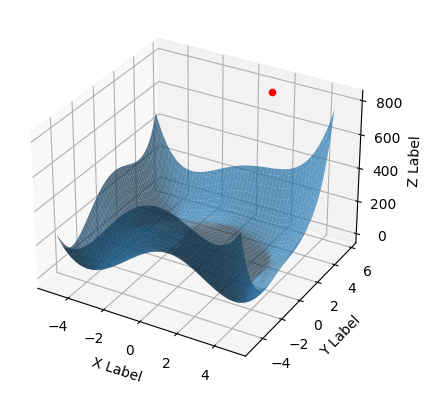

In [22]:
#тест графика обучения ADAM 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_Adam(Himmelblau,Himmelblau_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)

ax.scatter(point[0][adm_ind], point[1][adm_ind], point[2][adm_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [23]:
# ADAM 2
result = my_Adam(McCormick,McCormick_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)
adm_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Himmelblau ADAM Result: ', result[2])

X:  [ 1.1203236  -0.49771719  1.92636347  2.49913096  3.54935036  1.73731369
  2.91970675  2.84382954  0.87305964  2.36833763]
Y:  [5.75807344 1.55128935 4.15243805 1.23133885 0.69250906 4.42547121
 0.15550267 3.32651391 4.71439678 0.04357082]
Himmelblau ADAM Result:  [35.78410588 10.69242204 13.24399416  1.38151986  4.67746096 16.56378867
  4.71635525  5.17092212 25.59132841  3.62759561]


Text(0.5, 0, 'Z Label')

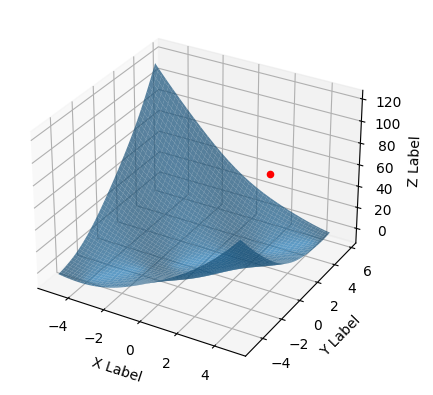

In [24]:
#тест графика обучения ADAM 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(McCormick(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = my_Adam(McCormick,McCormick_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)

ax.scatter(point[0][adm_ind], point[1][adm_ind], point[2][adm_ind], color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')